In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import networkx as nx

### Loading Dataset - Customer Transactions

In [2]:
df = pd.read_csv('customer_transaction.csv')

In [3]:
df.head()

,is_Alerted,is_Suspicious,Account_number,Transaction_date,transaction_location,transaction_amount,correspondent_bank,party_name,primary_party_account_number,debit_credit,...,identification_number,Score1,Score2,Score3,Score4,Score5,Score6,Score7,Score,is_noncitizen
0,0,0,481071431,11/20/19,94138.0,86810.0,Y,Callie Stephens,373956530,Debit,...,16651008 9730,0,0,0,1,1,0,0,2,0
1,0,0,481071431,11/3/19,13131.0,556.0,Y,Jack Walsh,866665098,Credit,...,16651008 9730,0,0,0,0,0,0,0,0,0
2,0,0,481071431,11/7/19,31014.0,2490.0,N,Marvin Sanders,333833165,Debit,...,16651008 9730,0,0,0,0,0,0,0,0,0
3,0,0,481071431,11/19/19,87141.0,3700.0,Y,Knox Richard,584609046,Debit,...,16651008 9730,0,0,0,0,0,0,0,0,0
4,0,0,481071431,11/1/19,88740.0,11575.0,Y,Glenna Bryant,636260652,Credit,...,16651008 9730,0,0,0,0,1,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 33 columns):
is_Alerted                      1424 non-null int64
is_Suspicious                   1424 non-null int64
Account_number                  1424 non-null int64
Transaction_date                1424 non-null object
transaction_location            1000 non-null float64
transaction_amount              1424 non-null float64
correspondent_bank              1424 non-null object
party_name                      1000 non-null object
primary_party_account_number    1424 non-null int64
debit_credit                    1424 non-null object
Account_First_name              667 non-null object
Account_Last_Name               667 non-null object
Account_Open_date               1424 non-null object
Account_type                    1424 non-null object
Account_Classification          1424 non-null object
Risk_level                      1424 non-null object
Zipcode                         1424 non-null obj

#### Score column is calculated based on various rules if transaction_amount > 10k or more than that. Risk_level also contributes to score calculation and other rule based scenarios which generally are part of ETL logic.


#### is_Alerted column represent an alert generated transaction by ETL system.
#### is_Suspicious column represent a Real Suspicious transaction reported by Compliance Person.



In [5]:
df.describe()

,is_Alerted,is_Suspicious,Account_number,transaction_location,transaction_amount,primary_party_account_number,Annual_income,Score1,Score2,Score3,Score4,Score5,Score6,Score7,Score,is_noncitizen
count,1424.000000,1424.000000,1.424000e+03,1000.000000,1424.000000,1.424000e+03,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000
mean,0.136938,0.116573,5.440362e+08,54366.597000,8491.331170,5.501509e+08,47878.659059,0.050562,0.167135,0.008427,0.009831,0.217697,0.247191,0.247191,0.948034,0.247191
std,0.343903,0.321024,2.555217e+08,26062.883698,35879.609748,2.562983e+08,35122.208412,0.219178,0.373227,0.091443,0.098700,0.412825,0.431530,0.431530,1.142101,0.431530
min,0.000000,0.000000,1.005775e+08,10013.000000,100.000000,1.001543e+08,12000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.259848e+08,32411.750000,500.000000,3.352303e+08,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,5.401266e+08,53346.500000,3862.500000,5.600725e+08,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,7.614837e+08,76249.500000,9256.250000,7.641838e+08,57084.958330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,1.000000,1.000000,9.996656e+08,99992.000000,978455.000000,9.996656e+08,279125.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [6]:
df.corr().head(2).transpose()

,is_Alerted,is_Suspicious
is_Alerted,1.000000,0.911953
is_Suspicious,0.911953,1.000000
Account_number,-0.013886,-0.041613
transaction_location,-0.039017,-0.045316
transaction_amount,0.168473,0.193095
primary_party_account_number,-0.038247,-0.017090
Annual_income,0.067657,0.111626
Score1,0.327619,0.075973
Score2,0.560690,0.558696
Score3,0.231437,0.253781


## is_Suspicious column will be our target variable 
is_Alerted column will not be used to train, as this column represents traditional method to generate alert.

In [7]:
df.columns

Index(['is_Alerted', 'is_Suspicious', 'Account_number', 'Transaction_date',
       'transaction_location', 'transaction_amount', 'correspondent_bank',
       'party_name', 'primary_party_account_number', 'debit_credit',
       'Account_First_name', 'Account_Last_Name', 'Account_Open_date',
       'Account_type', 'Account_Classification', 'Risk_level', 'Zipcode',
       'Annual_income', 'citizenship_country', 'email', 'address', 'branch',
       'Business_Sector', 'identification_number', 'Score1', 'Score2',
       'Score3', 'Score4', 'Score5', 'Score6', 'Score7', 'Score',
       'is_noncitizen'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 33 columns):
is_Alerted                      1424 non-null int64
is_Suspicious                   1424 non-null int64
Account_number                  1424 non-null int64
Transaction_date                1424 non-null object
transaction_location            1000 non-null float64
transaction_amount              1424 non-null float64
correspondent_bank              1424 non-null object
party_name                      1000 non-null object
primary_party_account_number    1424 non-null int64
debit_credit                    1424 non-null object
Account_First_name              667 non-null object
Account_Last_Name               667 non-null object
Account_Open_date               1424 non-null object
Account_type                    1424 non-null object
Account_Classification          1424 non-null object
Risk_level                      1424 non-null object
Zipcode                         1424 non-null obj

### Feature Selection

In [9]:
df_features = df[['is_Alerted', 'is_Suspicious', 'transaction_amount', 'correspondent_bank',
                  'debit_credit', 'Account_type', 'Account_Classification', 'Risk_level', 
                  'Annual_income', 'is_noncitizen']]

In [10]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 10 columns):
is_Alerted                1424 non-null int64
is_Suspicious             1424 non-null int64
transaction_amount        1424 non-null float64
correspondent_bank        1424 non-null object
debit_credit              1424 non-null object
Account_type              1424 non-null object
Account_Classification    1424 non-null object
Risk_level                1424 non-null object
Annual_income             1424 non-null float64
is_noncitizen             1424 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 111.3+ KB


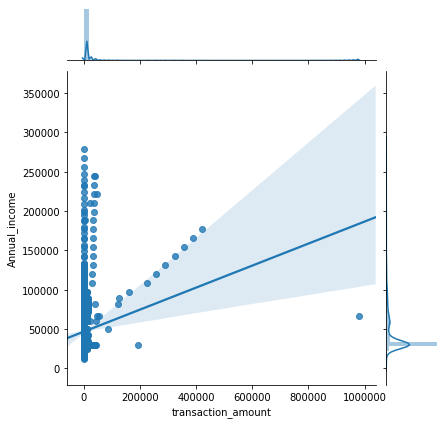

In [11]:
sns.jointplot(x='transaction_amount',y='Annual_income',data=df_features,kind='reg')

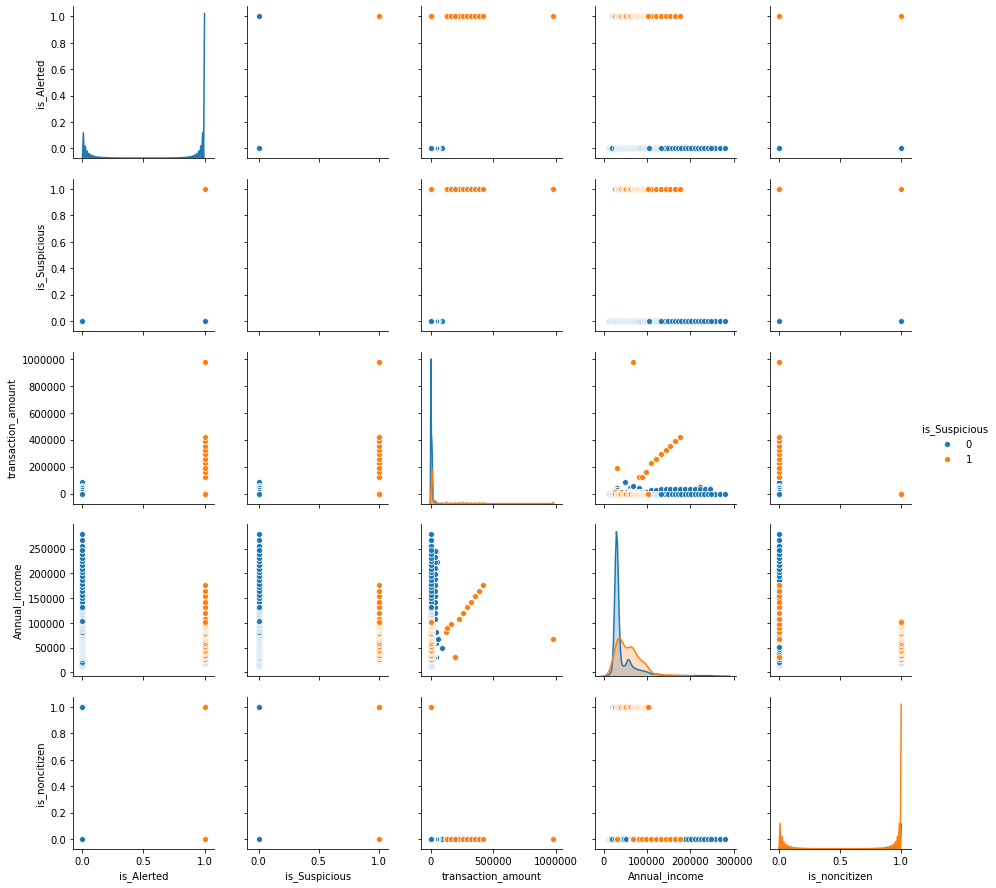

In [12]:
sns.pairplot(df_features,hue='is_Suspicious')

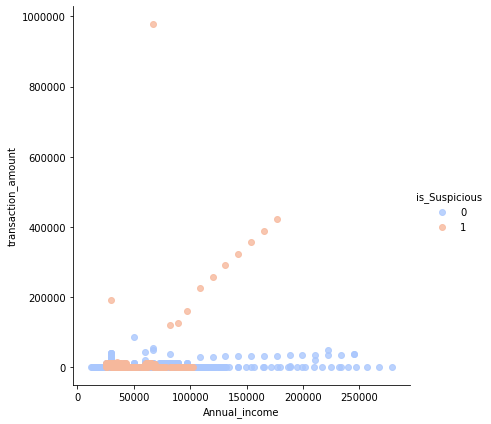

In [13]:
sns.lmplot('Annual_income','transaction_amount',data=df, hue='is_Suspicious',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

#### One-Hot-Encoding

In [14]:
df_transformed = pd.get_dummies(df_features)

In [15]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 16 columns):
is_Alerted                           1424 non-null int64
is_Suspicious                        1424 non-null int64
transaction_amount                   1424 non-null float64
Annual_income                        1424 non-null float64
is_noncitizen                        1424 non-null int64
correspondent_bank_N                 1424 non-null uint8
correspondent_bank_Y                 1424 non-null uint8
debit_credit_Credit                  1424 non-null uint8
debit_credit_Debit                   1424 non-null uint8
Account_type_B-Business              1424 non-null uint8
Account_type_P-Private               1424 non-null uint8
Account_Classification_C-Checking    1424 non-null uint8
Account_Classification_S-Savings     1424 non-null uint8
Risk_level_High                      1424 non-null uint8
Risk_level_Low                       1424 non-null uint8
Risk_level_Medium                 

In [16]:
df_transformed.corr().head(2).transpose()

,is_Alerted,is_Suspicious
is_Alerted,1.000000,0.911953
is_Suspicious,0.911953,1.000000
transaction_amount,0.168473,0.193095
Annual_income,0.067657,0.111626
is_noncitizen,0.638309,0.573054
correspondent_bank_N,-0.107488,-0.084958
correspondent_bank_Y,0.107488,0.084958
debit_credit_Credit,-0.026222,-0.055296
debit_credit_Debit,0.026222,0.055296
Account_type_B-Business,-0.198228,-0.181978


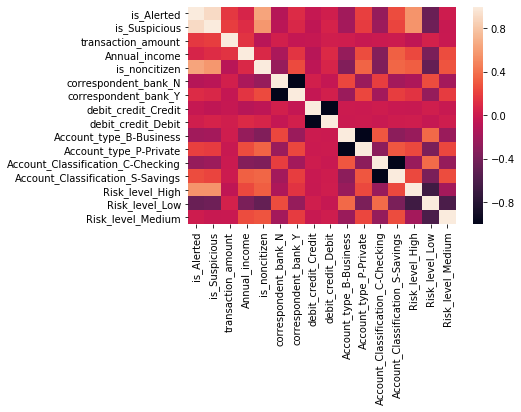

In [17]:
sns.heatmap(df_transformed.corr())

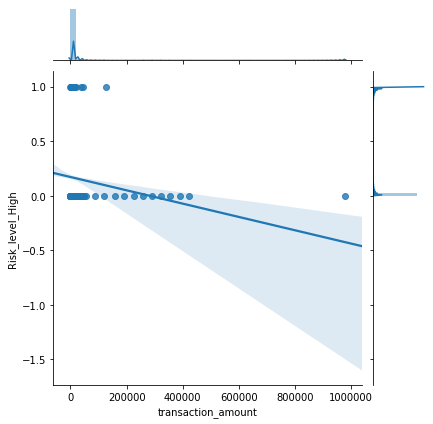

In [18]:
sns.jointplot(x='transaction_amount',y='Risk_level_High',data=df_transformed,kind='reg')

### Machine Learning Algorithms

In [19]:
X = df_transformed.drop(['is_Alerted', 'is_Suspicious'], axis=1)
y = df_transformed['is_Suspicious']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


#### Logistic Regression Model

In [20]:

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94       311
           1       1.00      0.07      0.12        45

    accuracy                           0.88       356
   macro avg       0.94      0.53      0.53       356
weighted avg       0.90      0.88      0.83       356

[[311   0]
 [ 42   3]]


In [21]:
cf = confusion_matrix(y_test,predictions)

In [22]:
TP = cf[0][0]
FP = cf[0][1]
FN = cf[1][0]
TN = cf[1][1]
recall = TP/(TP+FN)
accuracy = TP/(TP+FP)
print("Accuracy on testing data: {:.4f} \n\nRecall on testing data: {:.4f}".format(accuracy,recall))

Accuracy on testing data: 1.0000 

Recall on testing data: 0.8810


#### Random Forest Classifier

In [23]:

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       311
           1       0.97      0.80      0.88        45

    accuracy                           0.97       356
   macro avg       0.97      0.90      0.93       356
weighted avg       0.97      0.97      0.97       356

[[310   1]
 [  9  36]]


In [24]:
cf = confusion_matrix(y_test,predictions)
cf

array([[310,   1],
       [  9,  36]])

In [25]:
TP = cf[0][0]
FP = cf[0][1]
FN = cf[1][0]
TN = cf[1][1]

In [26]:
recall = TP/(TP+FN)
accuracy = TP/(TP+FP)

In [27]:
print("Accuracy on testing data: {:.4f} \n\nRecall on testing data: {:.4f}".format(accuracy,recall))

Accuracy on testing data: 0.9968 

Recall on testing data: 0.9718


## Analysis on Naive vs Machine Learning approach

In [28]:
# Number of transaction to be raised as suspicious by Naive approach or plain ETL logic
print("Alerted transactions:",len(df_transformed[df_transformed['is_Alerted'] == 1]))

# Number of transaction marked as real suspicious and goes for final reporting
print("Real Suspicious Transactions:",len(df_transformed[df_transformed['is_Suspicious']==1]))


# Number of False Positive generated by ETL/Naive logic
print("False Positive generated by Naive logic: {}%".format(round(100*(len(df_transformed[df_transformed['is_Alerted'] == 1]) - 
      len(df_transformed[df_transformed['is_Suspicious']==1]))/len(df_transformed[df_transformed['is_Suspicious']==1]),2)))


Alerted transactions: 195
Real Suspicious Transactions: 166
False Positive generated by Naive logic: 17.47%


### Comparing

In [29]:
print("False Positive generated by Machine Learning : {:.4f}%".format(100*FP/(TP+TN+FN)))
print("False Negative generated by Machine Learning : {:.4f}%".format(100*FN/(TN+TN+FP)))

False Positive generated by Machine Learning : 0.2817%
False Negative generated by Machine Learning : 12.3288%


# Network Analysis on Suspicious Transactions 
## Loading the single user profile data

In [30]:
df1 = pd.read_csv('Network_Analysis_Data.csv')
df1

,Is_Alerted,Account_number,Total_Tran_Amt,Total_transactions,Primary_party_acc_no,Weight_1,Weight_2,Final_Weight
0,1,11111111,18000,5,22222222,3,2,5
1,1,11111111,360000,8,33333333,5,4,9
2,1,11111111,3000,1,44444444,1,0,1
3,1,11111111,2000,1,55555555,1,0,1
4,1,11111111,13000,5,66666666,2,2,4
5,1,11111111,27000,3,77777777,5,1,6
6,1,11111111,49000,4,88888888,5,1,6
7,1,11111111,20000,5,99999999,3,2,5
8,1,11111111,6000,2,900000000,1,0,1


### Weights are calculated using nested if conditions
#### =IF(Total_Tran_Amt<10000,5,(Total_Tran_Amt<15000,4,(Total_Tran_Amt<20000,3,(Total_Tran_Amt<25000,2,1))))

#### =IF(Total_transactions>8,5,IF(Total_transactions>7,4,IF(Total_transactions>6,3,IF(Total_transactions>4,2, IF(Total_transactions>2,1,0)))))

### Creating a function that will define edges, nodes and weights for their relationships

In [31]:
Network_graph = nx.Graph()

#Function that will run for the length of dataframe df
def Create_Network():
    for i in range(len(df1)):
        Network_graph.add_edge(df1['Account_number'][i],df1['Primary_party_acc_no'][i], 
                               weight=df1['Final_Weight'][i])

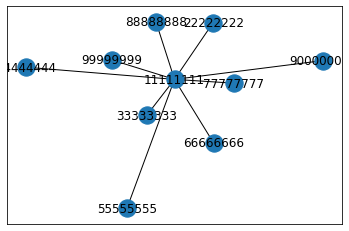

In [32]:
#calling the function
Create_Network()

#drawing the network diagram
nx.draw_networkx(Network_graph)

### Verifying the density

In [33]:
density = nx.density(Network_graph)
print(density)

0.2


## Network Graph for multiple user profiles:
### Loading the multi user profile data

In [34]:
df_multi = pd.read_csv('Network_Analysis_Data_Multi.csv')
df_multi

,Is_Alerted,Account_number,Total_Tran_Amt,Total_transactions,Primary_party_acc_no,Weight_1,Weight_2,Final_Weight
0,1,11111111,18000,5,22222222,3,2,5
1,1,11111111,36000,8,33333333,5,4,9
2,1,11111111,3000,1,44444444,1,0,1
3,1,22222222,2000,1,55555555,1,0,1
4,1,22222222,13000,5,66666666,2,2,4
5,1,22222222,27000,3,77777777,5,1,6
6,1,33333333,49000,4,88888888,5,1,6
7,1,33333333,20000,5,99999999,3,2,5
8,1,33333333,6000,2,22222222,1,0,1
9,1,44444444,11000,1,55555555,2,0,2


## Creating a function that will define edges, nodes and weights for their relationships

In [35]:
Network_graph_Multi = nx.Graph()

#Function that will run for the length of dataframe df
def Create_Network_Multi():
    for i in range(len(df_multi)):
        Network_graph_Multi.add_edge(df_multi['Account_number'][i],df_multi['Primary_party_acc_no'][i], 
                                     weight=df_multi['Final_Weight'][i])
        

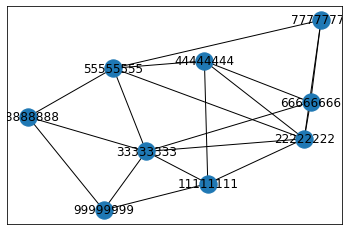

In [36]:
#Calling the function
Create_Network_Multi()
nx.draw_networkx(Network_graph_Multi)

In [37]:
density = nx.density(Network_graph_Multi)
print("Density:",density)

Density: 0.5555555555555556


# End Here